In [3]:
import numpy as np

## SVM

Gradient of Hinge loss: https://stats.stackexchange.com/questions/4608/gradient-of-hinge-loss

References:
- https://www.python-engineer.com/courses/mlfromscratch/07_svm/
- https://www.pycodemates.com/2022/10/implementing-SVM-from-scratch-in-python.html?m=1

In [161]:
class SVM():
    def __init__(self, iterations = 200, n = 2):
        self.w = np.zeros((n,1))
        self.b = 0
        self.iterations = iterations
        self.costs = []
        self.w_decay = 0.01
        self.lr = 0.0001
        self.n = n

    def train(self, x, y):
        for _ in [0]:#range(self.iterations):

            for i, xi in enumerate(x):
                xi = xi.reshape(self.n,1)
                # print(self.w.shape, xi.shape)
                grad_w = 0
                grad_b = 0
                M = y[i] * ( np.dot(self.w.T, xi) + self.b )
                cost = max(0, 1-M) + np.min(0.5 * (self.w**2))
                if M< 1:
                    grad_w = self.lr * -y[i] * xi
                    grad_b = self.lr * -y[i]
                    # print("grad", grad_w.shape, self.w.shape, grad_b)
                self.w = self.w  - (self.lr * self.w_decay * self.w ) - grad_w 
                self.b = self.b - grad_b
                self.costs.append(cost)
        print ("Cost", self.costs) 

    def hingeLoss(self, x, y):
        M = y * ( np.dot(self.w.T, x) + self.b) 
        # print(y.shape, m.shape, np.dot(self.w, x).shape)
        regularization_loss = 0.5 * (self.w**2) # dim=(2,1)
        return np.min(regularization_loss) + max(0, 1-M)

    def predict(self, x):
        return np.sign(np.dot(self.w.T, x) + self.b)


## Data creation

Creating 2 clusters of data

Cost [array([[1.]]), array([[0.99524437]]), array([[0.99177972]]), array([[0.98843625]]), array([[0.98282059]]), array([[0.97999925]]), array([[0.9773707]]), array([[0.97196886]]), array([[0.96410583]]), array([[0.95274358]]), array([[0.95855097]]), array([[0.94594536]]), array([[0.95288036]]), array([[0.92989203]]), array([[0.94639628]]), array([[0.9210555]]), array([[0.93320256]]), array([[0.95166934]]), array([[0.92260769]]), array([[0.9128302]]), array([[0.90799023]]), array([[0.90314123]]), array([[0.90035209]]), array([[0.89902879]]), array([[0.8867306]]), array([[0.86518658]]), array([[0.88766668]]), array([[0.86086035]]), array([[0.86576236]]), array([[0.85613935]]), array([[0.83590578]]), array([[0.81416038]]), array([[0.86272939]]), array([[0.84614375]]), array([[0.84540708]]), array([[0.85081311]]), array([[0.84958897]]), array([[0.85570309]]), array([[0.8394648]]), array([[0.7982784]]), array([[0.8087617]]), array([[0.80708097]]), array([[0.81406218]]), array([[0.78876541]]

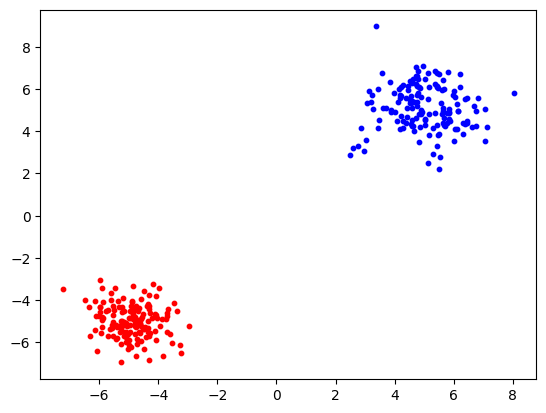

In [162]:
from sklearn.datasets import make_blobs

centers = [(-5, -5), (5, 5)]
cluster_std = [0.8, 1]

x, y = make_blobs(n_samples=300, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)
y = np.where(y==0, -1, 1)
plt.scatter(x[y == -1, 0], x[y == -1, 1], color="red", s=10, label="Cluster1")
plt.scatter(x[y == 1, 0], x[y == 1, 1], color="blue", s=10, label="Cluster2")

svm = SVM()
svm.train(x,y)
test_x = np.array([-5., -10 ])
print(svm.predict(test_x))

test_x = np.array([5., 10 ])
print(svm.predict(test_x))


[1.]
[1.]
[-1.]


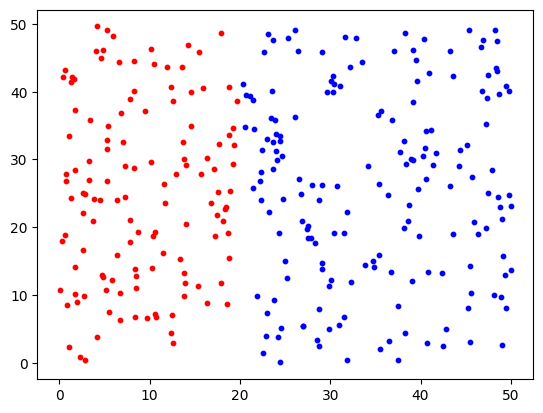

In [150]:
x = np.random.uniform(low=0., high=50, size=(2,300))
# print(x)
y = np.array([-1 if l< 20.0 else 1 for l,m in zip(*x)])
x = x.T
plt.scatter(x[y == -1, 0], x[y == -1, 1], color="red", s=10, label="Cluster1")
plt.scatter(x[y == 1, 0], x[y == 1, 1], color="blue", s=10, label="Cluster2")

svm = SVM()
svm.train(x,y)
test_x = np.array([-5., -10 ])
print(svm.predict(test_x))

test_x = np.array([20, 20])
print(svm.predict(test_x))

test_x = np.array([5, 20])
print(svm.predict(test_x))

## Visualization

[1.]
[-1.]
[-1.]


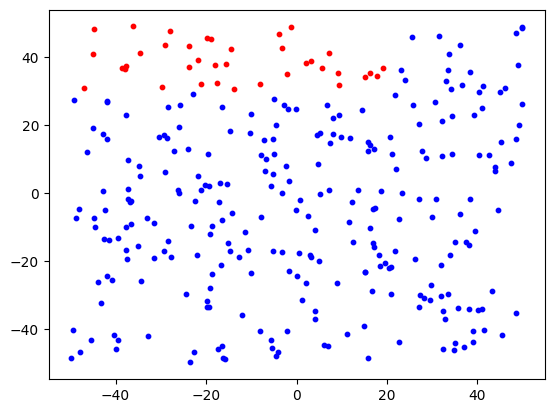

In [145]:
x = np.random.uniform(low=-50., high=50, size=(2,300))
y = np.array([-1 if l< 20.0 and m>30.0 else 1 for l,m in zip(*x)])
x = x.T

plt.scatter(x[y == -1, 0], x[y == -1, 1], color="red", s=10, label="Cluster1")
plt.scatter(x[y == 1, 0], x[y == 1, 1], color="blue", s=10, label="Cluster2")

svm = SVM()
svm.train(x,y)
test_x = np.array([-5., -10 ])
print(svm.predict(test_x))

test_x = np.array([20, 20])
print(svm.predict(test_x))

test_x = np.array([18, 20])
print(svm.predict(test_x))

In [157]:
np.array([1,2])**2

array([1, 4])